<a href="https://colab.research.google.com/github/plotnikovnikita1990/netology/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и просмотр данных

In [ ]:
df = pd.read_excel('data_hw_2__upd_.xlsx')
df.head(500)

,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48
...,...,...,...,...,...,...
495,540458,12501,Germany,2011-01-07,RED TOADSTOOL LED NIGHT LIGHT,50.39
496,540458,12501,Germany,2011-01-07,PENS ASSORTED SPACEBALL,52.21
497,540458,12501,Germany,2011-01-07,ASS FLORAL PRINT MULTI SCREWDRIVER,39.72
498,540458,12501,Germany,2011-01-07,ASSTD DESIGN 3D PAPER STICKERS,85.37


Формирование выборок по стране

In [ ]:
df_1 = df[df['Country'] == 'France']
df_2 = df[df['Country'] == 'Germany']

print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборкки имеют одинаковую длинну:  True


гистограммы плотности распределения

<ipython-input-21-da730683fe5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['TotalPrice'], 50)
<ipython-input-21-da730683fe5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['TotalPrice'], 50)


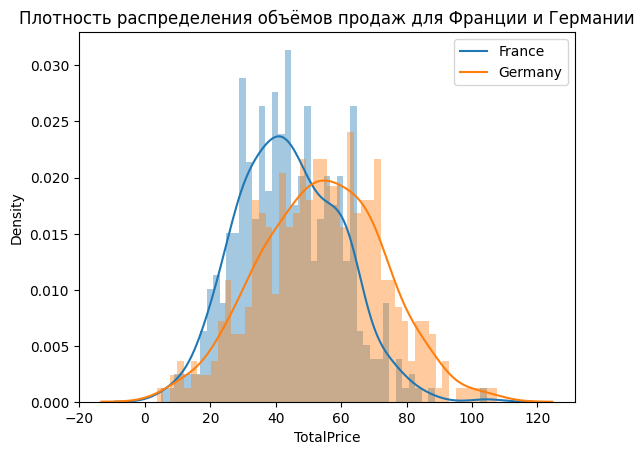

In [ ]:
sns.distplot(df_1['TotalPrice'], 50)
sns.distplot(df_2['TotalPrice'], 50)
plt.title('Плотность распределения объёмов продаж для Франции и Германии')
plt.legend(['France', 'Germany'])
plt.show()

Данные имеют нормальное распределение.
Визуально видно пересечение графиков

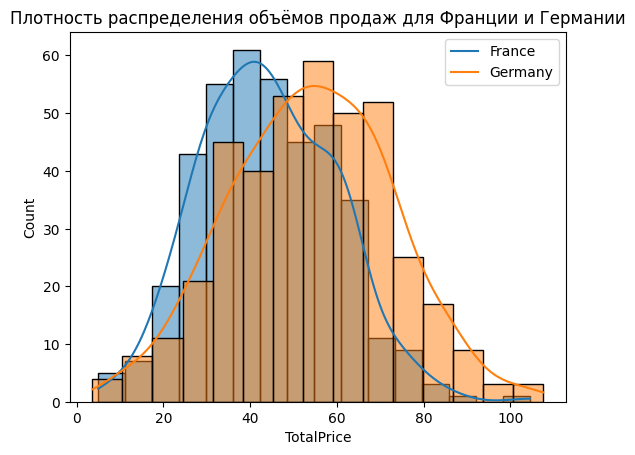

In [ ]:
sns.histplot(df_1['TotalPrice'], kde=True)
sns.histplot(df_2['TotalPrice'], kde=True)
plt.title('Плотность распределения объёмов продаж для Франции и Германии')
plt.legend(['France', 'Germany'])
plt.show()

Данные имеют нормальное распределение. Визуально видно пересечение графиков

Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.025                          # Уровень значимости

Н0 - Объёмы продаж Франции не отличаются от объёмов продаж Германии

Н1 - Объёмы продаж Франции отличаются от объёмов продаж Германии

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['TotalPrice'], df_2['TotalPrice'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


Объёмы продаж Франции отличаются от объёмов продаж Германии